# Project 1 - NY Motor Vehicle Collisions - Crashes

In [ ]:
import pandas as pd
data = pd.read_pickle(r"shared/Motor_Vehicle_Collisions_-_Crashes.pkl")

## Quiz Questions

### Q1: Which borough has had the second highest total number of crashes reported since 2012?

In [5]:
borough_distribution = data['BOROUGH'].value_counts()

In [6]:
borough_distribution

BOROUGH
BROOKLYN         441026
QUEENS           372457
MANHATTAN        313266
BRONX            205345
STATEN ISLAND     58297
Name: count, dtype: int64

### Q2: Considering the entire data set since July 2012, which borough has the most crashes for every 100,000 people?

In [10]:
population_data = {'BRONX': 1446788, 'BROOKLYN': 2648452,'MANHATTAN': 1638281,'QUEENS': 2330295,'STATEN ISLAND': 487155}
crashes = borough_distribution / borough_distribution.index.map(population_data) * 100000
crashes.sort_values(ascending=False)

BOROUGH
MANHATTAN        19121.628097
BROOKLYN         16652.217975
QUEENS           15983.255339
BRONX            14193.164444
STATEN ISLAND    11966.827806
dtype: float64

### Q3: What is the leading cause of crashes (ignoring 'Unspecified') (use the field 'CONTRIBUTING FACTOR VEHICLE 1')?

In [75]:
data = data.query("`CONTRIBUTING FACTOR VEHICLE 1` != 'Unspecified'")
cause = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().idxmax()
count = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().max()
accidents = data.shape[0]
proportion = count / accidents
cause, count, proportion

('Driver Inattention/Distraction', 401262, 0.3027229539746618)

### Q4: Continuing from the previous question - the top 5 causes of crashes (ignoring 'Unspecified') account for what proportion of total crashes?

In [30]:
top5 = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(5).sum()
top5_proportion = top5 / accidents
top5_proportion

0.5776082999059229

### Q5: Considering the entire data since 2012, what is the total count of accidents that involved two or more fatalities? 

In [80]:
data2 = pd.read_pickle(r"shared/Motor_Vehicle_Collisions_-_Crashes.pkl")
data2['NUMBER OF PERSONS KILLED'] = data2['NUMBER OF PERSONS KILLED'].fillna(0)
countofaccidents2 = data2[data2['NUMBER OF PERSONS KILLED'] >= 2].shape[0]
countofaccidents2

88

### Q6: On average, for every 1000 accidents, how many have resulted in at least one person dead?

In [45]:
data2['NUMBER OF PERSONS KILLED'] = data2['NUMBER OF PERSONS KILLED'].fillna(0)
countofaccidents1 = data2[data2['NUMBER OF PERSONS KILLED'] >= 1].shape[0]
totalaccidents = data2.shape[0]
average = (countofaccidents1/ totalaccidents) * 1000
average

1.3893258747079764

### Q7: What proportion of accidents in the data do not have a Cross Street Name?

In [47]:
cross = data2['CROSS STREET NAME'].isna().mean()
cross

0.37435098315615795

### Q8: Which combination of vehicles have the most number of accidents?

In [52]:
vehicle = data2.groupby(['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']).size()
combination = vehicle.idxmax()
combination

('Sedan', 'Sedan')

### Q9: Among crashes where the contributing factor (CONTRIBUTING FACTOR VEHICLE 1) was alcohol involvement, what proportion resulted in a fatality?

In [53]:
alcohol = data2[data2['CONTRIBUTING FACTOR VEHICLE 1'] == 'Alcohol Involvement']
proportion = (alcohol['NUMBER OF PERSONS KILLED'] > 0).mean()
proportion

0.0046638345031400075

### Q10: What proportion of crashes occur during the evening rush hour, defined as starting at 4 PM, and before 7 PM?

In [56]:
evening = data2[(data2['CRASH DATE_CRASH TIME'].dt.hour >= 16) & (data2['CRASH DATE_CRASH TIME'].dt.hour < 19)]

In [59]:
even= evening.count()
total = data.shape[0]
proportion = len(evening) / len(data2)
proportion

0.20514010935243243

### Q11: Among crashes involving motorcycles, what proportion resulted in injuries but no fatalities?

In [68]:
motorcycles = data2[(data2['VEHICLE TYPE CODE 1'].str.contains('MOTORCYCLE',na=False)) 
                     | (data2['VEHICLE TYPE CODE 2'].str.contains('MOTORCYCLE',na=False))]
injuries = motorcycles[(motorcycles['NUMBER OF PERSONS INJURED'] > 0)&(motorcycles['NUMBER OF PERSONS KILLED'] == 0)]
proportion = len(injuries) / len(motorcycles)
proportion

0.5004565018912221

### Q12: How many crashes involved bicycles as one of the vehicles? (Consider 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2')

In [74]:
bike = data2[(data2['VEHICLE TYPE CODE 1'].str.contains('BICYCLE',na=False)) 
                     | (data2['VEHICLE TYPE CODE 2'].str.contains('BICYCLE',na=False))]
l=len(bike)
l

19108

## Other Insights

### Annual Trend

In [ ]:
da = pd.read_pickle(r"shared/Motor_Vehicle_Collisions_-_Crashes.pkl")

In [9]:
da['CRASH DATE_CRASH TIME'] = da['CRASH DATE_CRASH TIME'].astype(str)
da['YEAR'] = da['CRASH DATE_CRASH TIME'].str.slice(0, 4)
yearly_counts = da['YEAR'].value_counts().sort_index()

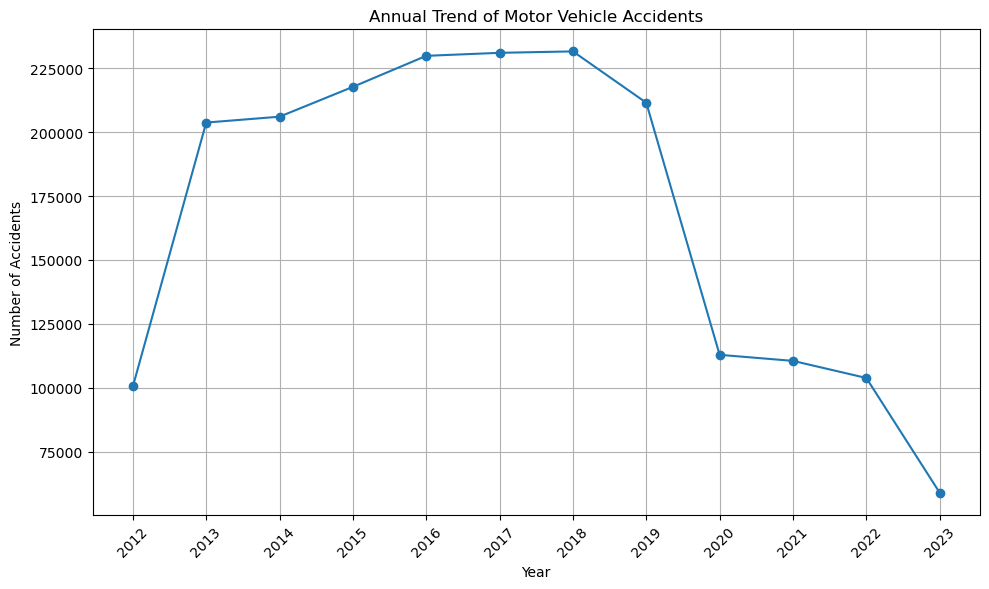

In [96]:
import matplotlib.pyplot as plt

yearly_counts = da['YEAR'].value_counts().sort_index()

years = yearly_counts.index.tolist()
accident_counts = yearly_counts.values.tolist()

plt.figure(figsize=(10, 6))
plt.plot(years, accident_counts, marker='o', linestyle='-')
plt.title('Annual Trend of Motor Vehicle Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Streets with high accident rates

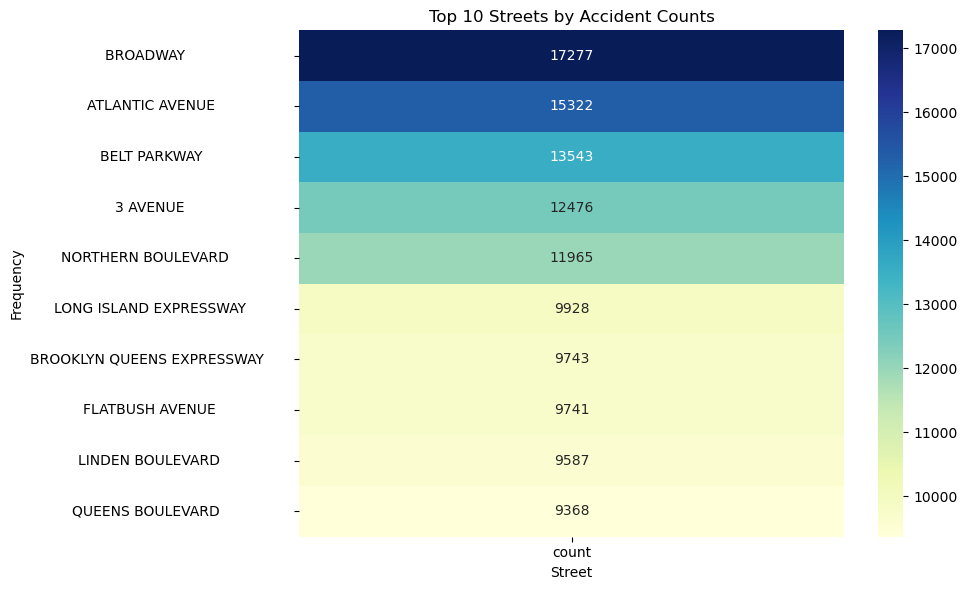

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
da = pd.read_pickle(r"shared/Motor_Vehicle_Collisions_-_Crashes.pkl")

top_streets = da['ON STREET NAME'].value_counts().head(10)

top_cross_streets = da['CROSS STREET NAME'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(top_streets), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Top 10 Streets by Accident Counts')
plt.xlabel('Street')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
